In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

## Response of the Single Degree of Freedom (SDOF) System

the response is given by the following formula:

$$ a(t) =  e^{-\zeta \omega \cdot t} \cdot \left[ 2 \zeta cos \left(\omega \sqrt{1-\zeta^2}t \right) + \frac{1-2\zeta^2} {\sqrt{1-\zeta^2}} sin\left(\omega \sqrt{1-\zeta^2}t \right) \right] $$

In [2]:
# time and frequency vectors
t = np.arange(0, 30, 0.002)
f = np.arange(2, 45, 2**(1.0/6.0)) #frequency change by 1/6 octave

# relative damping factor
dz = 0.05

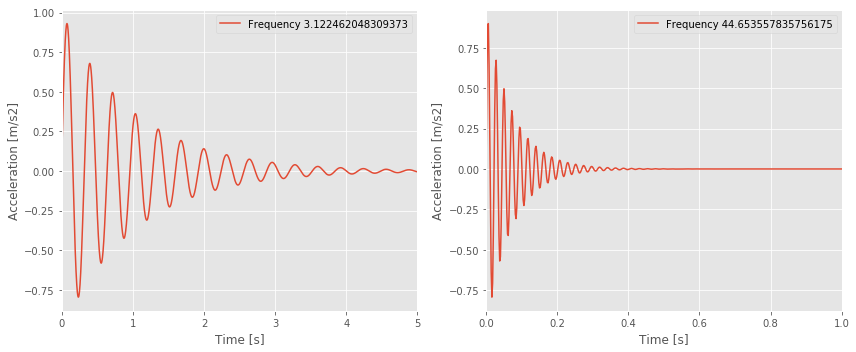

In [3]:
# omega
w1 = 2*np.pi*f[1]
# acceleration response calculation
a1 = np.exp(-dz*w1*t) * (2*dz*np.cos(w1*np.sqrt(1-dz**2)*t) + (1-2*dz**2)/np.sqrt(1-dz**2)*np.sin(w1*np.sqrt(1-dz**2)*t))

# omega
w2 = 2*np.pi*f[-1]
# acceleration response calculation
a2 = np.exp(-dz*w2*t) * (2*dz*np.cos(w2*np.sqrt(1-dz**2)*t) + (1-2*dz**2)/np.sqrt(1-dz**2)*np.sin(w2*np.sqrt(1-dz**2)*t))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(t, a1, label='Frequency ' + str(f[1]))
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s2]')
plt.legend()
plt.xlim(0, 5)

plt.subplot(122)
plt.plot(t, a2, label='Frequency ' + str(f[-1]))
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s2]')
plt.legend()
plt.xlim(0, 1)

plt.tight_layout();

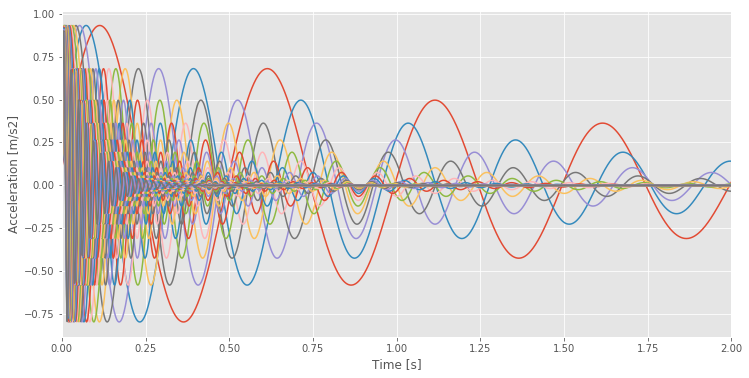

In [4]:
# wholistic approach
# omega
w = 2*np.pi*f

A = np.empty((len(t), len(f)))

for j in range(len(w)):
    for i in range(len(t)):
        A[i,j] = np.exp(-dz*w[j]*t[i]) * (2*dz*np.cos(w[j]*np.sqrt(1-dz**2)*t[i]) +
                                            (1-2*dz**2)/np.sqrt(1-dz**2)*np.sin(w[j]*np.sqrt(1-dz**2)*t[i]))

plt.figure(figsize=(12,6))
plt.plot(t,A)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s2]')
plt.xlim(0, 2);

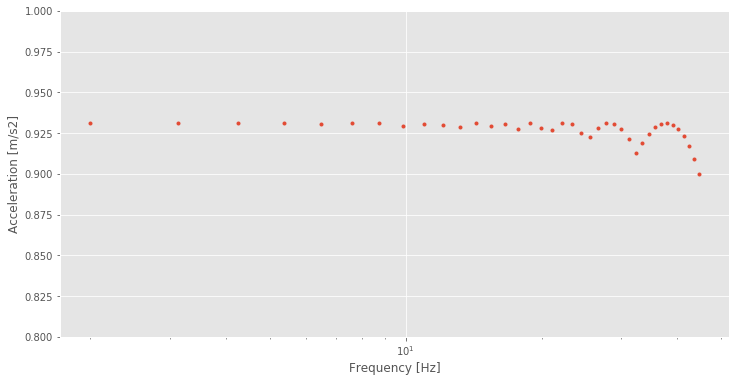

In [5]:
a_max =[]
for i in range(A.shape[1]):
    a_max.append(max(np.abs(A[:,i])))

plt.figure(figsize=(12,6))
plt.semilogx(f, a_max, marker='.', linestyle='none')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Acceleration [m/s2]')
plt.ylim(0.8, 1);

## Exication of the test object

given by the formula

$$ a(t) = 	\sum\limits_{i} A_i sin \left( \omega_i t + \phi_i \right) + \Psi(t) $$

In [6]:
#Aux variables definition
ZPA = 0.4

#Amplitudes
AA = [np.random.random()*ZPA for k in f]
    
#Random angle
fi = [np.random.random()*np.pi/2 for k in f]

# excitation for frequency range
B = np.empty((len(t), len(f)))
for j in range(len(w)):
    for i in range(len(t)):
        B[i,j] = AA[j]*np.sin(w[j]*t[i] + fi[j])

# sum across columns (per frequency)
C = np.sum(B, axis=1)

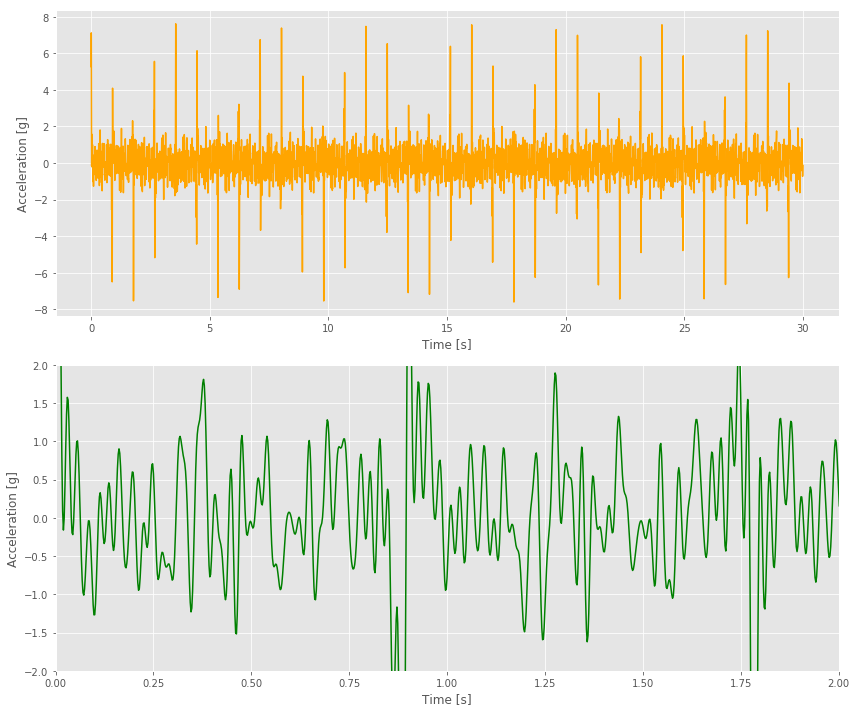

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(t, C, color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')

plt.subplot(212)
plt.plot(t, C, color='green')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')
plt.xlim(0,2)
plt.ylim(-2,2)
plt.tight_layout();

### Window functions definition (Psi function)

In [8]:
window = np.hamming(len(C))
window2 = np.bartlett(len(C))
window3 = np.blackman(len(C))
window4 = np.hanning(len(C))
window5 = np.kaiser(len(C), beta=3.5)

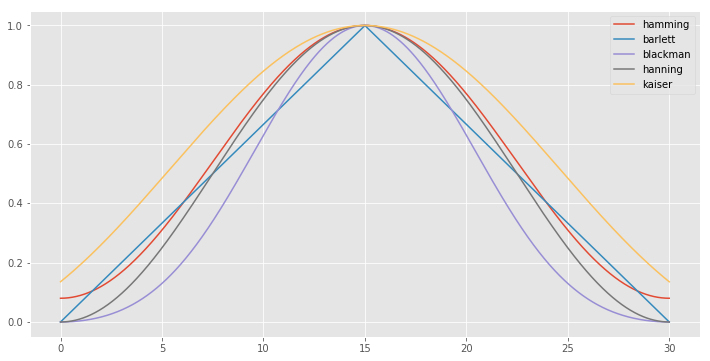

In [9]:
plt.figure(figsize=(12,6))
plt.plot(t, window, label='hamming')
plt.plot(t, window2, label='barlett')
plt.plot(t, window3, label='blackman')
plt.plot(t, window4, label='hanning')
plt.plot(t, window5, label='kaiser')
plt.legend();

### Exitation with window function

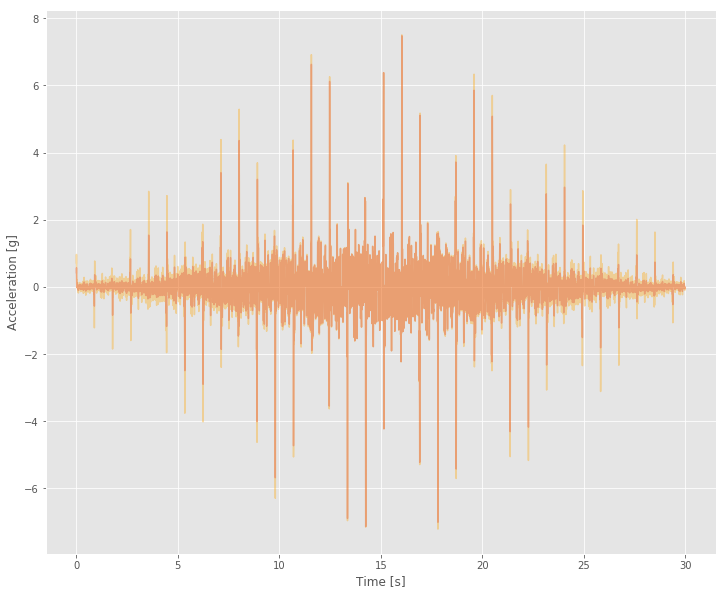

In [10]:
plt.figure(figsize=(12,10))
plt.plot(t, C*window5, color='orange', alpha=0.35)
plt.plot(t, C*window, alpha=0.35)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]');

### Frequency Response Function (FRF) of SDOF

Spatial parameter model

<img src='FRF.png'>

In [11]:
# definition of parameters

# spring constant [N/m]
k = 40

# mass [kg]
m = 2

# damping
c = 5

# frequency
f1 = np.arange(0, 45, 0.001)
# angular frequency
omega = 2*np.pi*f1

In [12]:
# frequency response function (FRF)
H = 1 / (-omega**2*m + 1j*omega*c + k)

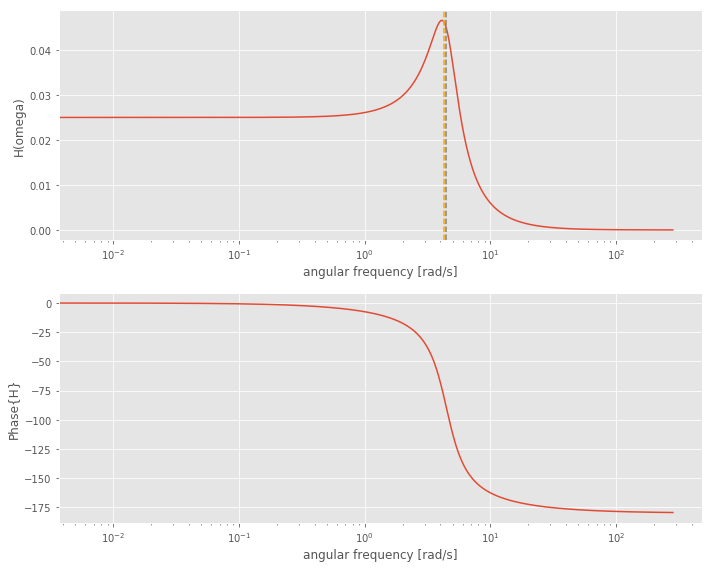

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(211)
plt.semilogx(omega, np.abs(H))
plt.axvline(np.sqrt(k/m), color='grey', linestyle='--')
plt.axvline(np.sqrt(k/m - (c/(2*m))**2), color='orange', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('H(omega)')

plt.subplot(212)
plt.semilogx(omega, np.angle(H)*360/(2*np.pi))
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('Phase{H}')

plt.tight_layout()

In [14]:
1/k

0.025

In [15]:
omega_0 = np.sqrt(k/m)
omega_0

4.47213595499958

In [16]:
sigma = c / (2*m)
omega_d = np.sqrt(omega_0**2 - sigma**2)
omega_d

4.293891009329418

Modal parameter model (because in reality mass, spring constant and damping coefficient are not known) <br>

<img src='modal.png'>

In [17]:
# examplary data from testing

# modal constant
C = 1.4

# resonance frequency (undamped nat freq)
omega_00 = 2*np.pi*5.8

# damping
dzeta = 6.6/100

# damped natural freq
omega_d = omega_00 * np.sqrt(1 - dzeta**2)

# residue
R =  -1j* C * 0.54
R_con = np.conj(R)

# sigma
sigma = np.sqrt(omega_00**2 - omega_d**2)

# pole location
p = -sigma + 1j*omega_d
p_con = np.conj(p)

In [18]:
# frequency response function FRF
H2 = R / (1j*omega - p) + R_con / (1j*omega - p_con)

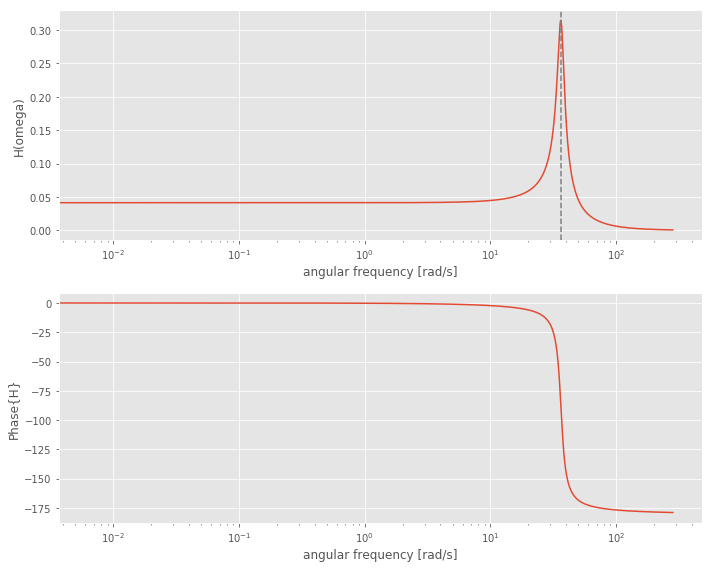

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(211)
plt.semilogx(omega, np.abs(H2))
plt.axvline(omega_d, color='grey', linestyle='--')
#plt.axvline(np.sqrt(k/m - (c/(2*m))**2), color='orange', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('H(omega)')

plt.subplot(212)
plt.semilogx(omega, np.angle(H2)*360/(2*np.pi))
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('Phase{H}')

plt.tight_layout()

In [20]:
omega_d, omega_00

(36.36301644700366, 36.4424747816416)

In [30]:
# approach by SP institute with correction based on literature
f0 = omega_00/(2*np.pi)
H3 = C * (f0**2 - f1**2 - 1j*2*dzeta*f0*f1) / ((f0**2 - f1**2)**2 + (2*dzeta*f0*f1)**2)

# as written in the materials from SP 
H4 = C * (f0**2 + 1j*2*dzeta*f0*f1) / (f0**2 - f1**2 + 1j*2*dzeta*f0*f1)

In [25]:
max(abs(H2)), max(abs(H3)), max(abs(H4)), R

(0.3143184302530442, 0.31597005497484115, 10.72064487649719, -0.756j)

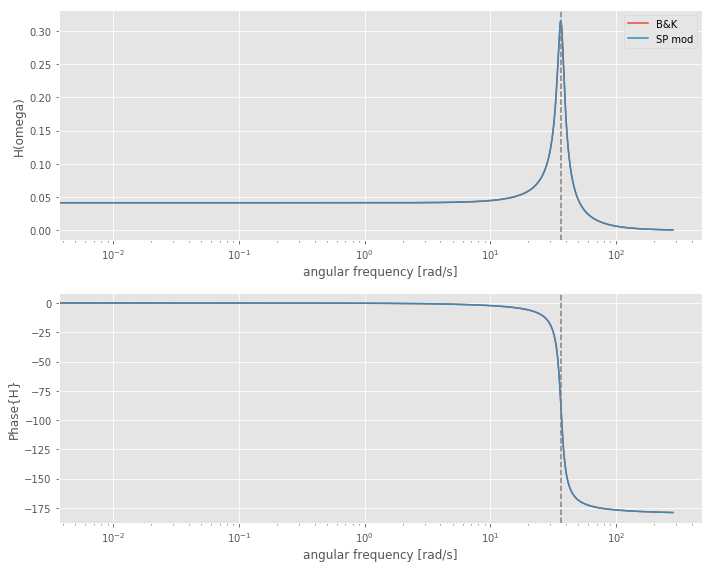

In [28]:
plt.figure(figsize=(10,8))

plt.subplot(211)
plt.semilogx(omega, np.abs(H2), label='B&K')
plt.semilogx(omega, np.abs(H3), label='SP mod')
plt.axvline(omega_d, color='grey', linestyle='--')
#plt.axvline(np.sqrt(k/m - (c/(2*m))**2), color='orange', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('H(omega)')
plt.legend()

plt.subplot(212)
plt.semilogx(omega, np.angle(H2)*360/(2*np.pi))
plt.semilogx(omega, np.angle(H3)*360/(2*np.pi))
plt.axvline(omega_d, color='grey', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('Phase{H}')


plt.tight_layout()

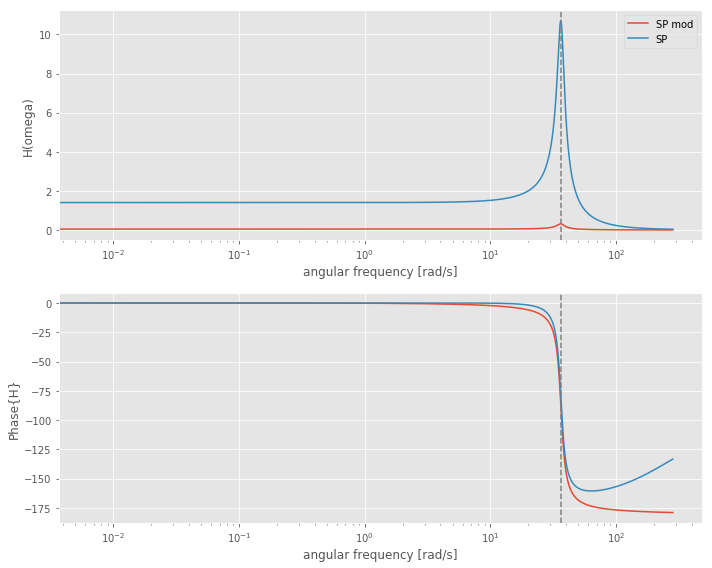

In [29]:
plt.figure(figsize=(10,8))

plt.subplot(211)
plt.semilogx(omega, np.abs(H3), label='SP mod')
plt.semilogx(omega, np.abs(H4), label='SP')
plt.axvline(omega_d, color='grey', linestyle='--')
#plt.axvline(np.sqrt(k/m - (c/(2*m))**2), color='orange', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('H(omega)')
plt.legend()

plt.subplot(212)
plt.semilogx(omega, np.angle(H3)*360/(2*np.pi))
plt.semilogx(omega, np.angle(H4)*360/(2*np.pi))
plt.axvline(omega_d, color='grey', linestyle='--')
plt.xlabel('angular frequency [rad/s]')
plt.ylabel('Phase{H}')


plt.tight_layout()